In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline


TOPO="test"
SCHED="rtt"
REP=1


In [96]:
downloads = pd.DataFrame()
for i in range(0,REP):
    d = pd.read_csv("./{topo}-{sched}/download-{i}.csv".format(topo=TOPO, sched=SCHED, i=i))
    d["i"] = i
    downloads = pd.concat([downloads, d])

downloads["mbps"] = downloads["recv_bytes"] * 8 / (1024)/ downloads["elapsed"]


<AxesSubplot: xlabel='i'>

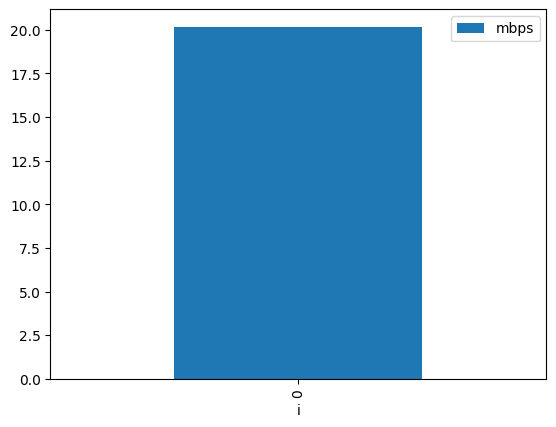

In [97]:
downloads.plot.bar(x="i", y = "mbps")

In [98]:
stats = pd.read_csv("./{}-{}/path-0.csv".format(TOPO, SCHED))

stats.index = pd.to_timedelta(stats["elapsed"], unit="ms")
stats["sent_bits"] = stats["sent_bytes"] * 8
stats.head()

,elapsed,local,remote,sent_bytes,recv_bytes,cwnd,bif,rtt,rttvar,quantum,sent_bits
elapsed,,,,,,,,,,,
0 days 00:00:01.034000,1034,10.0.3.10:4433,10.0.1.1:5555,1683,357,13500,1683,0,0,13500,13464
0 days 00:00:01.046000,1046,10.0.3.10:4433,10.0.1.1:5555,2290,1707,13500,536,11,4,13500,18320
0 days 00:00:01.057000,1057,10.0.3.10:4433,10.0.1.1:5555,2290,1754,13500,0,11,3,13500,18320
0 days 00:00:01.205000,1205,10.0.3.10:4433,10.0.1.1:5555,2290,1754,13500,0,11,3,13500,18320
0 days 00:00:01.205000,1205,10.0.3.10:4433,10.0.2.1:6666,1350,1350,13500,1350,0,0,13500,10800


In [99]:
remote_addr_lte = "10.0.1.1:5555"
remote_addr_wifi = "10.0.2.1:6666"

stats["path"] = "lte"
stats.loc[stats['remote']==remote_addr_wifi, "path"] = "wifi"

In [100]:
stats.head()

,elapsed,local,remote,sent_bytes,recv_bytes,cwnd,bif,rtt,rttvar,quantum,sent_bits,path
elapsed,,,,,,,,,,,,
0 days 00:00:01.034000,1034,10.0.3.10:4433,10.0.1.1:5555,1683,357,13500,1683,0,0,13500,13464,lte
0 days 00:00:01.046000,1046,10.0.3.10:4433,10.0.1.1:5555,2290,1707,13500,536,11,4,13500,18320,lte
0 days 00:00:01.057000,1057,10.0.3.10:4433,10.0.1.1:5555,2290,1754,13500,0,11,3,13500,18320,lte
0 days 00:00:01.205000,1205,10.0.3.10:4433,10.0.1.1:5555,2290,1754,13500,0,11,3,13500,18320,lte
0 days 00:00:01.205000,1205,10.0.3.10:4433,10.0.2.1:6666,1350,1350,13500,1350,0,0,13500,10800,wifi


## Throughput and RTT

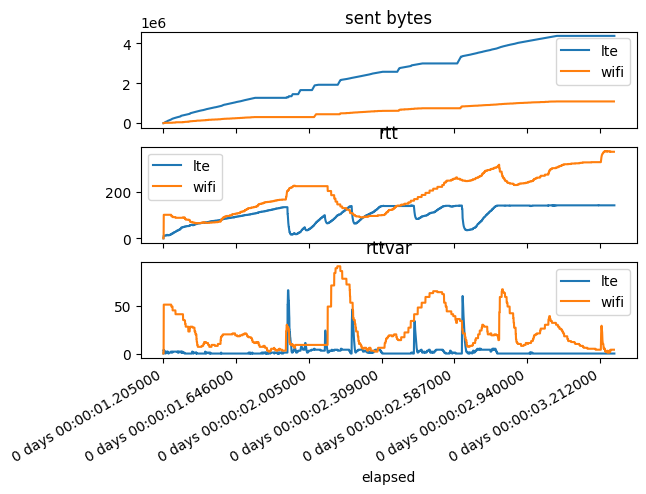

In [101]:
figure,axis =plt.subplots(3,1)


stats[stats["path"] == "lte"]["sent_bytes"].plot(label="lte",ax=axis[0])
stats[stats["path"] == "wifi"]["sent_bytes"].plot(label="wifi",ax=axis[0])
axis[0].legend()
axis[0].set_title("sent bytes")

stats[stats["path"] == "lte"]["rtt"].plot(label="lte",ax=axis[1])
stats[stats["path"] == "wifi"]["rtt"].plot(label="wifi",ax=axis[1])
axis[1].set_title("rtt")
axis[1].legend()

stats[stats["path"] == "lte"]["rttvar"].plot(label="lte",ax=axis[2])
stats[stats["path"] == "wifi"]["rttvar"].plot(label="wifi",ax=axis[2])
axis[2].set_title("rttvar")
axis[2].legend()


plt.gcf().autofmt_xdate()

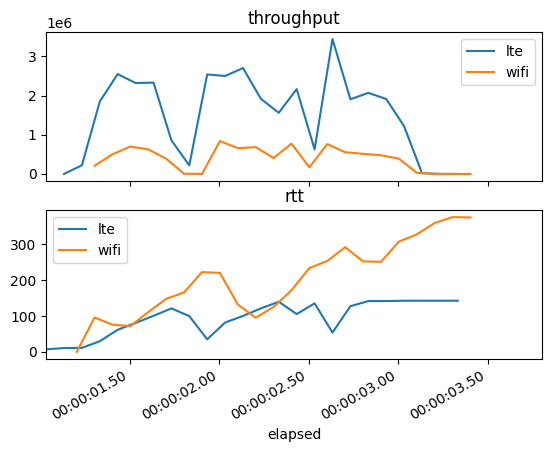

In [102]:
figure,axis =plt.subplots(2,1)


stats[stats["path"] == "lte"]["sent_bits"].resample("100ms").mean().diff().plot(label="lte",ax=axis[0])
stats[stats["path"] == "wifi"]["sent_bits"].resample("100ms").mean().diff().plot(label="wifi",ax=axis[0])
axis[0].legend()
axis[0].set_title("throughput")

stats[stats["path"] == "lte"]["rtt"].resample("100ms").mean().plot(label="lte",ax=axis[1])
stats[stats["path"] == "wifi"]["rtt"].resample("100ms").mean().plot(label="wifi",ax=axis[1])
axis[1].set_title("rtt")
axis[1].legend()
plt.gcf().autofmt_xdate()

Text(0.5, 1.0, 'RTT VAR')

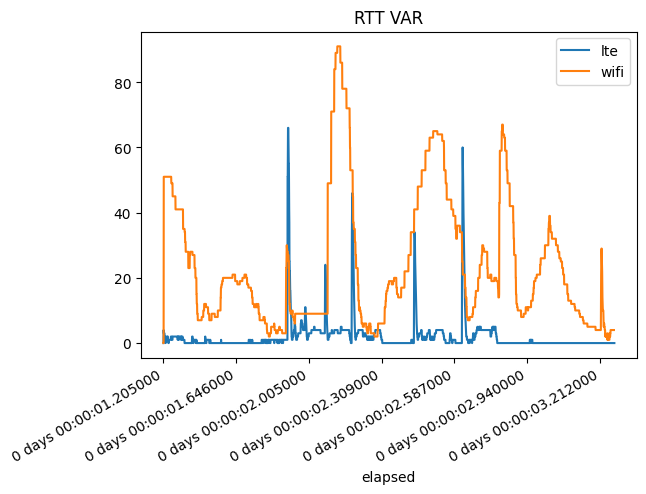

In [103]:
stats[stats["path"] == "lte"]["rttvar"].plot(label="lte")
stats[stats["path"] == "wifi"]["rttvar"].plot(label="wifi")
plt.legend()
plt.title("RTT VAR")


## CWND and BIF

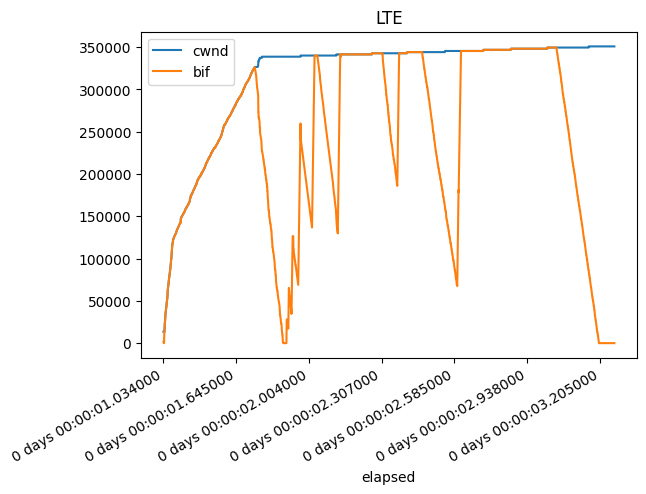

In [104]:
stats[stats["path"] == "lte"].plot(y=["cwnd","bif"])
plt.title("LTE")
plt.legend()
plt.gcf().autofmt_xdate()

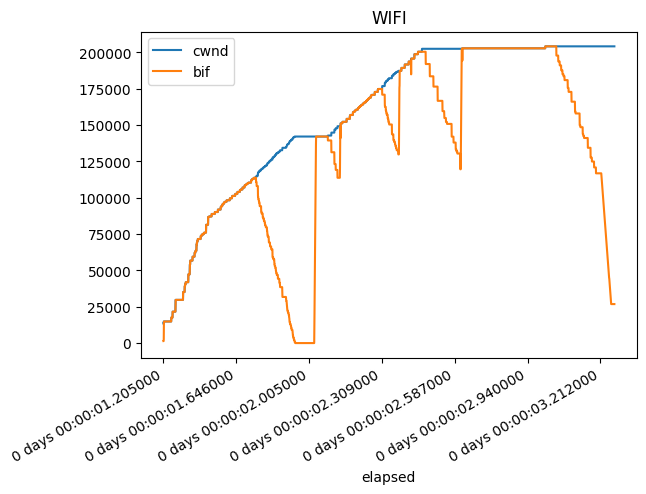

In [105]:
stats[stats["path"] == "wifi"].plot(y=["cwnd","bif"])
plt.title("WIFI")
plt.legend()



## Connection stats

In [106]:
conn = pd.read_csv("./{}-{}/conn-0.csv".format(TOPO, SCHED))

In [107]:
conn.index = pd.to_timedelta(conn["elapsed"], unit="ms")

Text(0.5, 1.0, 'Lost bytes')

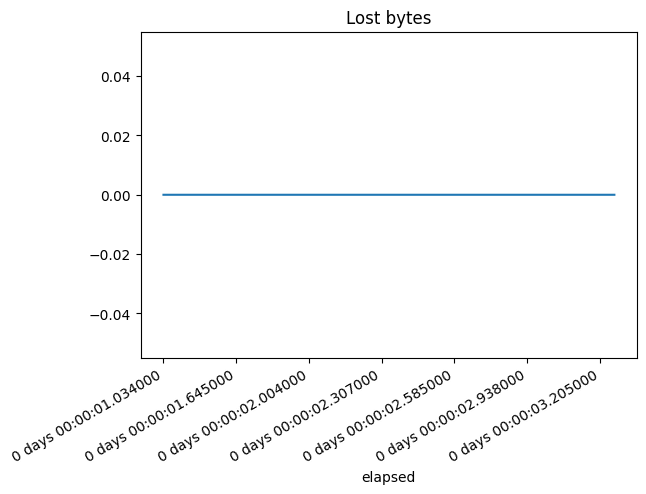

In [108]:
conn["lost_bytes_total"].plot()
plt.title("Lost bytes")


Text(0.5, 1.0, 'sent_bytes')

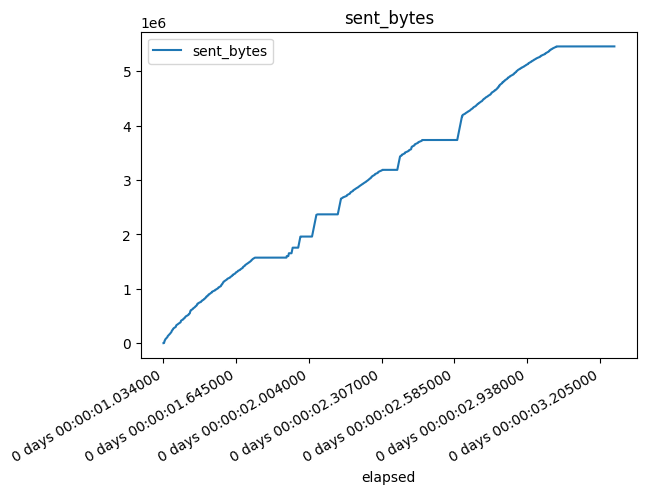

In [109]:
conn[["sent_bytes"]].cumsum().plot()
plt.title("sent_bytes")

<AxesSubplot: xlabel='elapsed'>

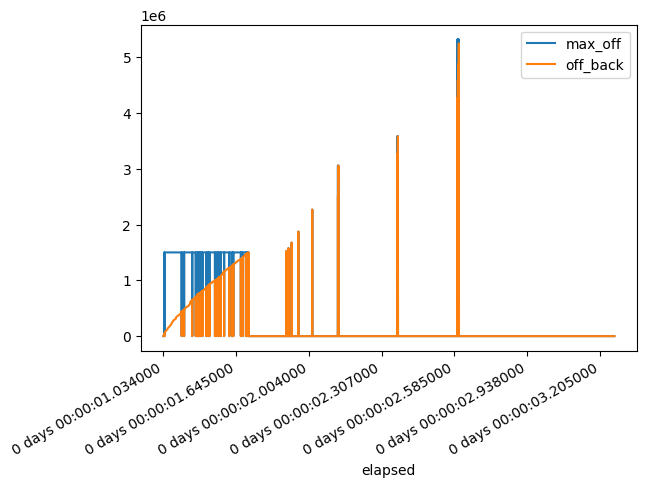

In [110]:
conn[["max_off", "off_back"]].plot()

<AxesSubplot: xlabel='elapsed'>

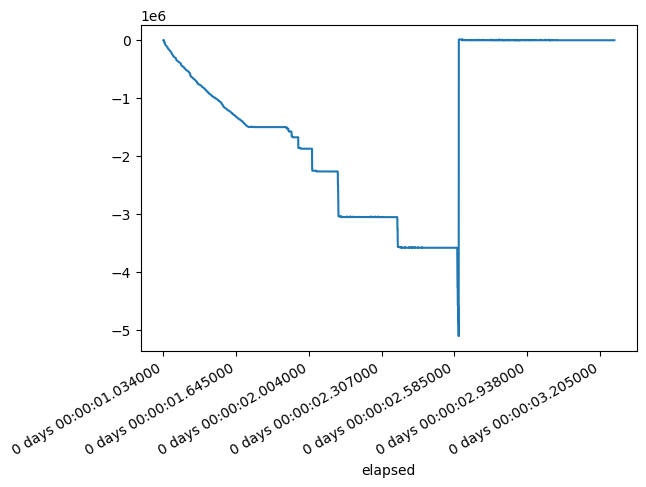

In [111]:
(-conn["stream_written"] + conn["sent_bytes"]).plot()

<AxesSubplot: xlabel='elapsed'>

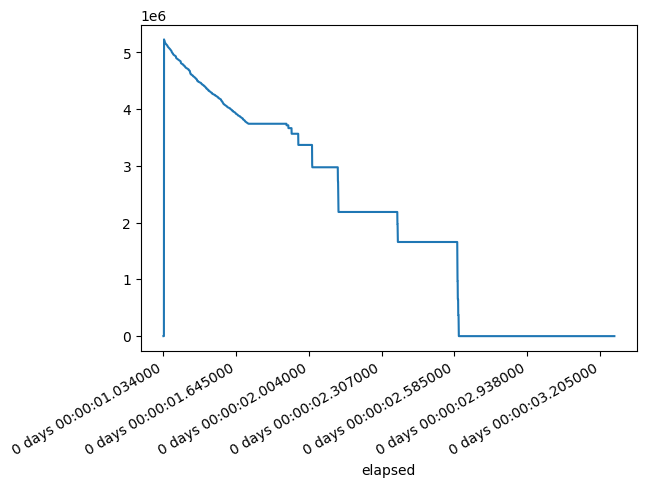

In [112]:
conn["pending"].plot()

## Client Stats

In [113]:
client = pd.read_csv("./{}-{}/client-0.csv".format(TOPO, SCHED))

FileNotFoundError: [Errno 2] No such file or directory: './test-rtt/client-1.csv'

In [ ]:


client["path"] = "lte"
client.loc[client['local']==remote_addr_wifi, "path"] = "wifi"

client.loc[client["path"] == "lte"]["recv_bytes_total"] = client[client["path"] == "lte"]["recv_bytes"].cumsum()
client.loc[client["path"] == "wifi"]["recv_bytes_total"] = client[client["path"] == "wifi"]["recv_bytes"].cumsum()

client.head()

/tmp/ipykernel_3640/893710382.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  client.loc[client["path"] == "lte"]["recv_bytes_total"] = client[client["path"] == "lte"]["recv_bytes"].cumsum()
/tmp/ipykernel_3640/893710382.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  client.loc[client["path"] == "wifi"]["recv_bytes_total"] = client[client["path"] == "wifi"]["recv_bytes"].cumsum()


,elapsed,local,remote,recv_bytes,off_front,max_off,path
0,10,10.0.1.1:5555,10.0.3.10:4433,89,0,0,lte
1,26,10.0.1.1:5555,10.0.3.10:4433,1200,0,0,lte
2,27,10.0.1.1:5555,10.0.3.10:4433,483,0,0,lte
3,39,10.0.1.1:5555,10.0.3.10:4433,607,0,0,lte
4,141,10.0.2.1:6666,10.0.3.10:4433,1350,0,0,wifi


KeyError: "None of [Index(['recv_bytes_total'], dtype='object')] are in the [columns]"

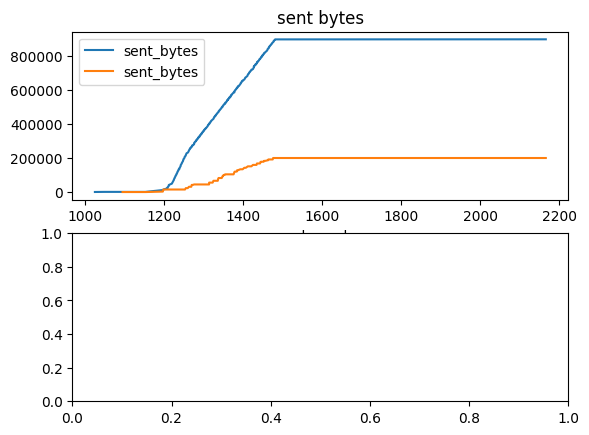

In [ ]:
figure,axis =plt.subplots(2,1)


stats[stats["path"] == "lte"][["elapsed", "sent_bytes"]].plot(x="elapsed", label="lte",ax=axis[0])
stats[stats["path"] == "wifi"][["elapsed", "sent_bytes"]].plot(x="elapsed",label="wifi",ax=axis[0])
axis[0].legend()
axis[0].set_title("sent bytes")

client[client["path"] == "lte"][["recv_bytes_total"]].cumsum().plot(label="lte", ax=axis[1])
client[client["path"] == "wifi"][["recv_bytes_total"]].cumsum().plot(label="wifi", ax=axis[1])
axis[1].legend()
axis[1].set_title("recv bytes")


In [ ]:
stats["sent_bytes"].sum()

377376544